## Importing the required libraries for EDA

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
import warnings
warnings.filterwarnings('ignore')

## Loading the data into the data frame.

In [4]:
data = pd.read_csv("diabetes\diabetes.csv") # Replace with your dataset.

In [5]:
# To display the top 5 rows 
data.head(5)   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail(5)                        # To display the botton 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
## Checking the types of data
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Dropping irrelevant columns (if you have in your dataset)

In [8]:
# as all values in the above diabetes dataset are either int or float and usually relevant for classification
# so in such cases there is no need to drop any values directly
# however its depends on dataset and the attributes you have in it.
# so use where required

# data = data.drop([], axis=1)
# data.head(5)

## Dropping the duplicate rows (if there in your dataset)

In [9]:
data.shape

(768, 9)

### Checking if you have duplicate rows in your dataset

In [ ]:
# No duplicates found in this dataset
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [11]:
data = data.drop_duplicates()
data.shape
# Reduced after removing duplicates

(768, 9)

# Making A corealtion HeatMap

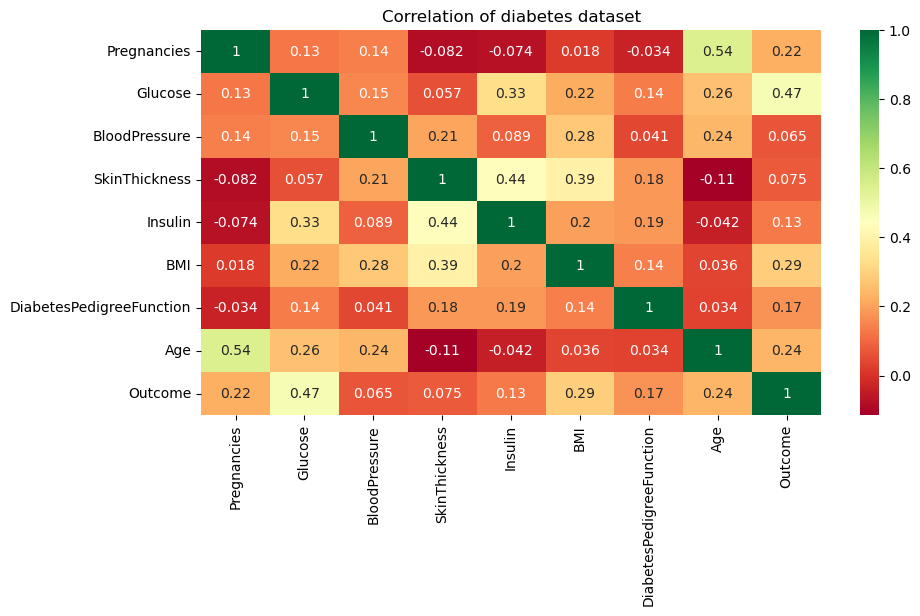

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number']) 

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot= True, cmap='RdYlGn')
plt.title("Correlation of diabetes dataset")
plt.show()

# Select features and target

In [35]:
data.shape

(768, 9)

In [46]:
# Separate Features and Target
X = data.drop("Outcome", axis=1) # Replace with the target (label) of your own dataset 
y = data["Outcome"]

print(X.shape, y.shape) # print the number of data instances and the attribues

(768, 8) (768,)


### As you can see above there are 768 instances / samples and each sample has 8 attributes / feature vector / independent variables
### and Outcome is the dependent / target / label variable or class variable

# Identify Numerical and Categorical Features

In [47]:
# get the column names of the numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns 
# get the column names of the categorical features (if any in your dataset else ignore)
categorical_features = X.select_dtypes(include=['object']).columns 

print("Numerical Features\n",numerical_features, "Shape: ", numerical_features.shape)
print("Categorical Features\n",categorical_features, "Shape: ", categorical_features.shape)

Numerical Features
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object') Shape:  (8,)
Categorical Features
 Index([], dtype='object') Shape:  (0,)


## Preprocessing 
### Treating missing values using imputation 
### and scaling to standarized the values

In [48]:
# Numerical Features
imputer_num = SimpleImputer(strategy='mean')
X[numerical_features] = imputer_num.fit_transform(X[numerical_features])
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
print("X Shape: ", X.shape)

X Shape:  (768, 8)


### As in this dataset there is no categorical features so there is no need to do next commneted code to execute
### While if you have some categorical data in your data set then surely use the below code

In [50]:
# # Categorical Features
# imputer_cat = SimpleImputer(strategy='most_frequent')
# X[categorical_features] = imputer_cat.fit_transform(X[categorical_features])
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))


In [51]:
# print("X_Encoded Shape: ", X_encoded.shape)

In [52]:
# X_encoded.columns = encoder.get_feature_names_out(categorical_features)
# X_encoded
# print("X_Encoded Shape: ", X_encoded.shape, "X Shape: ", X.shape)

### Combining both numerical and categorical again to single set X

In [ ]:
# X_new = X.drop(categorical_features, axis=1)
# print("X_new Shape: ", X_new.shape)

X_new Shape:  (10820, 5)


In [ ]:
# X_Comb = pd.concat([pd.DataFrame(X_new.values), pd.DataFrame(X_encoded.values)], axis=1)
# X_Comb.head(5)
# print("X Comb Shape: ", X_Comb.shape)

X Comb Shape:  (10820, 14)


In [53]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Split data into training and testing sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate the Models

In [56]:
# Creating a dictionary of models 
models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
    }

In [65]:
# iterate each model presented in above dict to traning and evaluation and save the results in results list
results = []
for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f_measure = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_prob)
            print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "ROC-AUC": roc,
            "F1-Score": f_measure
        })
        roc = 0
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Cross-validation scores: {scores}")
        print(f"Mean cross-validation score: {scores.mean()}")
        print("-" * 30)

AUC-ROC: 0.7292929292929293
Model: Decision Tree
Accuracy: 0.7403
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Cross-validation scores: [0.7398374  0.78861789 0.68292683 0.75609756 0.70491803]
Mean cross-validation score: 0.7344795415167267
------------------------------
AUC-ROC: 0.820018365472911
Model: Random Forest
Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Cross-validation scores: [0.7804878  0.79674797 0.7479

# Display Results Summary

In [66]:

results_df = pd.DataFrame(results)
print("\n--- Regression Model Results ---")
print(results_df)


--- Regression Model Results ---
           Model  Accuracy   ROC-AUC  F1-Score
0  Decision Tree  0.740260  0.729293  0.655172
1  Random Forest  0.746753  0.820018  0.642202
2            SVM  0.727273  0.000000  0.596154
